In [1]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.mode.chained_assignment = None

In [2]:
train = pd.read_csv("train.csv")
train

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.285450,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.596800,-3.951150,14.507600,-4520.000000,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.428420,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.354700,1.332120,17.750200,-4520.000000,817.705994,388.829987,A
2,1,CA,0.019531,1,10.671500,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.407600,1.537860,22.247000,-4520.000000,817.705994,388.829987,A
3,1,CA,0.023438,1,11.452500,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.336700,2.544920,18.998600,-4520.000000,817.705994,388.829987,A
4,1,CA,0.027344,1,7.283210,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.293200,1.699620,22.812799,-4520.000000,817.705994,388.829987,A
5,1,CA,0.031250,1,6.067460,23.128300,8.645660,14.380800,16.055500,26.925200,...,-9.289120,21.440599,23.253700,19.069599,-0.765018,26.451900,-4520.000000,817.705994,388.829987,A
6,1,CA,0.035156,1,-1.376020,20.972000,3.754160,13.766700,18.122000,29.391199,...,-0.604736,20.993401,21.556200,17.327299,1.465000,21.289301,-4520.000000,817.705994,388.829987,A
7,1,CA,0.039062,1,1.547870,18.398100,-9.113150,-1.033160,22.627001,32.816601,...,17.483601,22.912600,23.187000,18.462700,0.299232,23.691500,-4520.000000,817.705994,388.829987,A
8,1,CA,0.042969,1,-7.789460,12.210700,-8.953760,1.091740,28.526501,35.267200,...,16.681101,28.779600,28.382099,20.697300,-6.620750,31.672701,-4520.000000,817.705994,388.829987,A
9,1,CA,0.046875,1,-11.177500,18.235901,-1.035220,4.751110,25.983801,30.499100,...,0.489098,21.937500,21.629299,19.525999,-5.186040,21.618700,-4520.000000,817.705994,388.829987,A


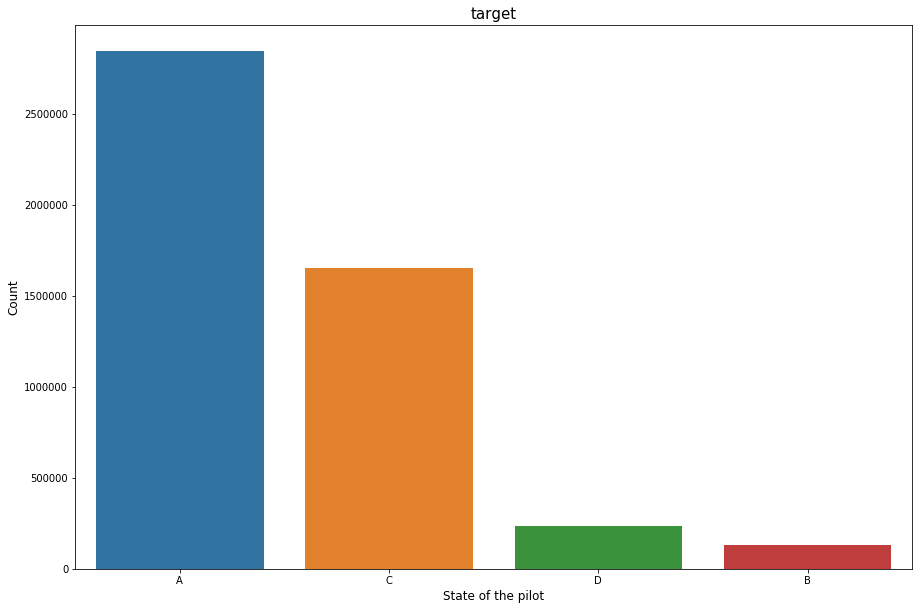

In [3]:
plt.figure(figsize=(15,10)) #count A,B,C,D個數
sns.countplot(train['event'])
plt.xlabel("State of the pilot", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("target", fontsize=15)
plt.show()

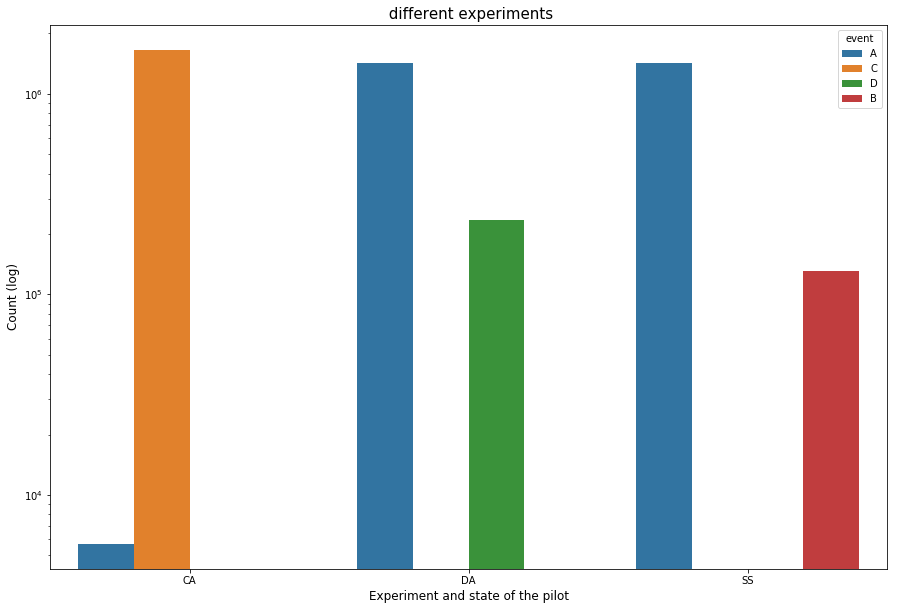

In [4]:
#區分DA,CA,SS
plt.figure(figsize=(15,10))
sns.countplot('experiment', hue='event', data=train)
plt.xlabel("Experiment and state of the pilot", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
plt.yscale('log')
plt.title(" different experiments", fontsize=15)
plt.show()

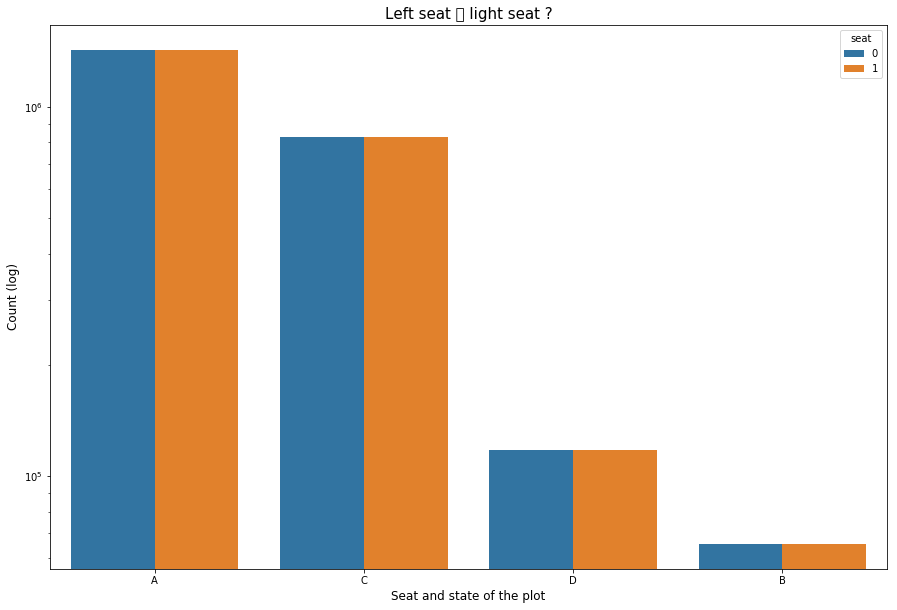

In [5]:
#0,1區分正副駕駛
plt.figure(figsize=(15,10))
sns.countplot('event', hue='seat', data=train)
plt.xlabel("Seat and state of the plot", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
plt.yscale('log')
plt.title("Left seat 、 light seat ?", fontsize=15)
plt.show()

In [6]:
test = pd.read_csv("test.csv")
test.head(5)

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,...,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,...,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,...,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,...,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,...,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


In [7]:
import warnings
import pandas as pd
import numpy as np


%matplotlib inline
pd.options.mode.chained_assignment = None

In [ ]:
#print(train["event"])

In [8]:
from sklearn.model_selection import train_test_split #分訓練及測試

train, val_df = train_test_split(train, test_size=0.2, random_state=420)
print(f"Training on {train.shape[0]} samples.")

Training on 3893936 samples.


In [9]:
train.loc[train['event']=="A",'event']=0
train.loc[train['event']=="B",'event']=1
train.loc[train['event']=="C",'event']=2
train.loc[train['event']=="D",'event']=3

In [10]:
#print(val_df["event"])

In [11]:
val_df.loc[val_df['event']=="A",'event']=0
val_df.loc[val_df['event']=="B",'event']=1
val_df.loc[val_df['event']=="C",'event']=2
val_df.loc[val_df['event']=="D",'event']=3

In [12]:
#print(val_df["event"])

In [13]:
import lightgbm as lgb

features = ["crew", "seat","ecg","r","gsr"]
      
def run_lgb (train, val_df):

    
    params = {"objective" : "multiclass",
              "num_class": 4,
              "metric" : "multi_error",
              "num_leaves" : 30,
              "min_child_weight" : 50,
              "learning_rate" : 0.1,
              "bagging_fraction" : 0.7,
              "feature_fraction" : 0.7,
              "bagging_seed" : 420,
              "verbosity" : -1
             }

    lg_train = lgb.Dataset(train[features], label=(train["event"]))   
   
    lg_test = lgb.Dataset(val_df[features], label=(val_df["event"]))
    
    model = lgb.train(params, lg_train, 1000, valid_sets=[lg_test], early_stopping_rounds=50, verbose_eval=100)
    
    return model

#print(train["event"])

model = run_lgb(train, val_df)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's multi_error: 0.0856541
[200]	valid_0's multi_error: 0.0749709
[300]	valid_0's multi_error: 0.06996
[400]	valid_0's multi_error: 0.0670991
[500]	valid_0's multi_error: 0.064569
[600]	valid_0's multi_error: 0.0627478
[700]	valid_0's multi_error: 0.0616116
[800]	valid_0's multi_error: 0.0604046
[900]	valid_0's multi_error: 0.0596958
[1000]	valid_0's multi_error: 0.0586481
Did not meet early stopping. Best iteration is:
[995]	valid_0's multi_error: 0.0586439


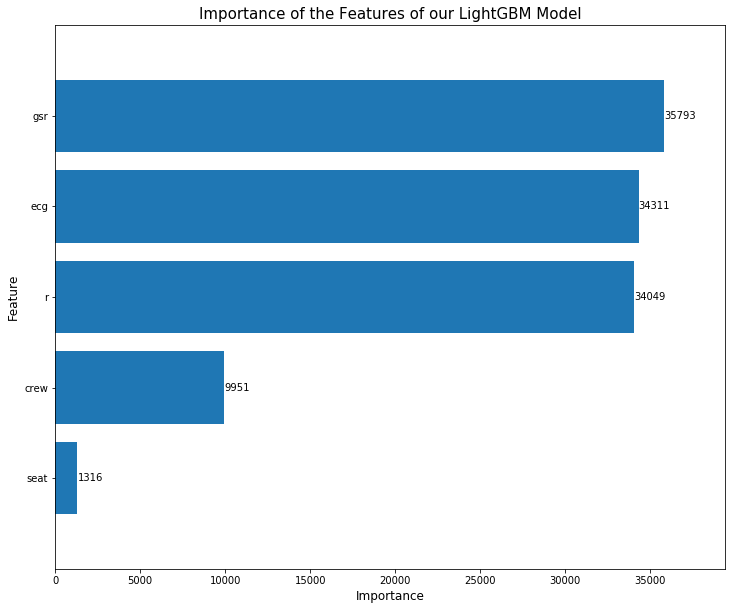

In [14]:
#看特徵重要重度
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features of our LightGBM Model", fontsize=15)
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2041e512eb8>)

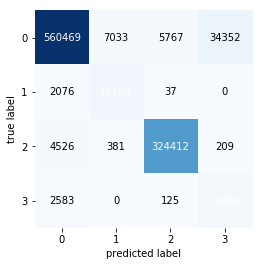

In [15]:
from sklearn.metrics import confusion_matrix

pred_val = model.predict(val_df[features], num_iteration=model.best_iteration)

from mlxtend.plotting import plot_confusion_matrix

conf_mat_val = confusion_matrix(np.argmax(pred_val, axis=1), val_df["event"].values)
plot_confusion_matrix(conf_mat_val, ["0", "1", "2", "3"])

In [16]:
pred_test = model.predict(test[features], num_iteration=model.best_iteration)    #預測

In [ ]:
#輸出檔案
submission = pd.DataFrame(np.concatenate((np.arange(len(test))[:, np.newaxis], pred_test), axis=1), columns=['id', 'A', 'B', 'C', 'D'])
submission['id'] =  submission['id'].astype(int)

In [ ]:
submission.head()

In [ ]:
submission.to_csv("R_submission.csv", index=False)